In [97]:
# %matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import datetime as dt

import folium
import branca
import bar_chart_race as bcr

---
# Thu thập dữ liệu

- Dữ liệu được lấy tại trang web của WHO, về chủ đề COVID-19 và vaccin liên quan trên toàn thế giới. Link chi tiết [tại đây](https://covid19.who.int/info/)
- Về vấn đề cấp phép thì dữ liệu nảy được WHO cấp phép cho các hoạt động vì lợi ích cộng đồng. Nguyên văn như sau:
    >WHO supports open access to the published output of its activities as a fundamental part of its mission and a public benefit to be encouraged wherever possible. Permission from WHO is not required for the use of the WHO coronavirus disease (COVID-19) dashboard material or data available for download
- WHO có nguồn dữ liệu này được cung cấp bởi các phương tiện truyền thông chính thống trong thời gian từ ngày 31/12/2019 - 21/3/2020. Từ ngày 22/3/2020 dữ liệu được tổng hợp bằng báo cáo hằng ngày của WHO
    >From the 31 December 2019 to the 21 March 2020, WHO collected the numbers of confirmed COVID-19 cases and deaths through official communications under the International Health Regulations (IHR, 2005), ..., Since 22 March 2020, global data are compiled through WHO region-specific dashboards (see links below), and/or aggregate count data reported to WHO headquarters daily. 

    Note: Dữ liệu từ ngày T7, CN được tính vào dữ liệu của ngày T2. Với các quốc gia Trung Đông, dữ liệu ở ngày T6 không được cập nhật.
    
    >Starting 19 June 2021, daily counts of COVID-19 confirmed cases and deaths reported to WHO headquarters on Saturdays and Sundays will be updated on this dashboard on the following Monday. Furthermore, data from the Eastern Mediterranean Region are no long update on Fridays.

Thông tin các file mà bọn em sử dụng, được WHO mô tả như sau:
1. `WHO-COVID-19-global-data.csv` : thống kê số liệu mỗi ngày của các quốc gia.
2. `WHO-COVID-19-global-table-data.csv`: thống kế số liệu thời gian gần đây của các quốc gia.
3. `vaccination-data.csv`: dữ liệu tình hình tiêm chủng tại các quốc gia.
4. `vaccination-metadat.csv`: dữ liệu vaccin trên toàn thế giới.

Dữ liệu được thu thập từ ngày 03/01/2020 đến 02/12/2021 của 237 quốc qua trên thế giới.

---
# Khám phá dữ liệu

Ở bước này nhóm em sẽ khám phá dữ liệu ở 4 tập tin ở trên. ĐƯợc chia thành 4 phần riêng đó là phần tình hình COVID-19 và 
tình hình Vaccin ở các quốc gia. 

**Note**: Trong quá trình khám phá sẽ có những phần tiền xử lí đơn giản.

<hr style="border:1px solid blue"> </hr>

## Khám phá dữ liệu tình hình COVID-19 các quốc gia

### Đọc dữ liệu từ file

- Đọc dữ liệu từ file `WHO-COVID-19-global-table-data.csv` rồi lưu vào dataframe `global_table_df`.
- Để Index là cột `Name`, riêng index `Global` đại diện cho toàn cầu.

In [98]:
global_table_df = pd.read_csv('dataset/WHO-COVID-19-global-table-data.csv',index_col= False)
global_table_df = global_table_df.set_index('Name')
global_table_df.head()

,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
Name,,,,,,,,,,,
Global,NaN,263563622,3381.387611,3973600,50.979273,653682,5232562,67.131117,47864,0.614071,7804
United States of America,Americas,48413265,14626.247000,605870,183.041000,131187,778336,235.145000,6388,1.930000,1831
India,South-East Asia,34615757,2508.380000,60326,4.371000,9216,470115,34.066000,2647,0.192000,391
Brazil,Americas,22105872,10399.855000,62760,29.526000,11413,614964,289.314000,1625,0.764000,283
The United Kingdom,Europe,10329078,15215.328000,307577,453.079000,53067,145281,214.007000,848,1.249000,141


### Dữ liệu có bao nhiêu dòng, cột

Tính số dòng và số cột của dataframe `global_table_df` rồi lưu vào `num_rows_global_table` và `num_cols_global_table`

In [99]:
num_rows_global_table , num_cols_global_table = global_table_df.shape
print(f'Dữ liệu có {num_rows_global_table} dòng.')
print(f'Dữ liệu có {num_cols_global_table} cột.')

Dữ liệu có 238 dòng.
Dữ liệu có 11 cột.


Chúng ta không xét tới dòng index `Global` nên dữ liệu gồm 237 `quốc gia`, đúng với mô tả ở trên.

### Mỗi dòng có ý nghĩa gì ? Có vấn đề về ý nghĩa giữa các dòng khác nhau hay không ?

Theo quan sát sơ bộ và file mô tả dữ liệu trên website chính của WHO thì dữ liệu cho biết thông tin về tính hình COVID-19 của từng quốc gia.\
Có vẻ không có vấn đề về ý nghĩa từng dòng.

### Dữ liệu có bị lặp không ?

Tính số dòng dữ liệu bị trùng (nếu có) rồi lưu vào biến `num_rows_dupicated`.

In [100]:
num_rows_duplicated = num_rows_global_table - len(global_table_df.index.drop_duplicates())
print(num_rows_duplicated)

0


### Mỗi cột có ý nghĩa gì ?

Dựa vào mô tả chính thức trên website WHO, em đã mô tả ý nghĩa từng cột dữ liệu trong file `description_global_table.csv`

In [101]:
pd.set_option("display.max_colwidth",200)
description_global_table = pd.read_csv('dataset/Description-global-table.csv',
                                       delimiter= '\t',index_col='Field name')

In [102]:
description_global_table

,Type,Description
Field name,,
Name,String,"Country, territory, area"
WHO_region,String,WHO Region
Cases - cumulative total,Integer,Cumulative confirmed cases reported to WHO to date.
Cases - cumulative total per 100000 population,Decimal,"Cumulative confirmed cases reported to WHO to date per 100,000 population."
Cases - newly reported in last 7 days,Integer,New confirmed cases reported in the last 7 days. Calculated by subtracting previous cumulative case count (8 days prior) from current cumulative cases count.
Cases - newly reported in last 7 days per 100000 population,Decimal,"New confirmed cases reported in the last 7 days per 100,000 population."
Cases - newly reported in last 24 hours,Integer,New confirmed cases reported in the last 24 hours. Calculated by subtracting previous cumulative case count from current cumulative cases count.
Deaths - cumulative total,Integer,Cumulative confirmed deaths reported to WHO to date.
Deaths - cumulative total per 100000 population,Decimal,"Cumulative confirmed deaths reported to WHO to date per 100,000 population."


### Mỗi cột hiện tại đang có dữ liệu gì ? Có cột nào có kiểu dữ liệu không phù hợp không ?

In [103]:
global_table_df.dtypes

WHO Region                                                       object
Cases - cumulative total                                          int64
Cases - cumulative total per 100000 population                  float64
Cases - newly reported in last 7 days                             int64
Cases - newly reported in last 7 days per 100000 population     float64
Cases - newly reported in last 24 hours                           int64
Deaths - cumulative total                                         int64
Deaths - cumulative total per 100000 population                 float64
Deaths - newly reported in last 7 days                            int64
Deaths - newly reported in last 7 days per 100000 population    float64
Deaths - newly reported in last 24 hours                          int64
dtype: object

Vậy **Không có gì bất thường**

### Phân bố dữ liệu dạng numerical

Dữ liệu ở đây phần lớn ở dạng `numerical`, trừ `WHO Region`. \
`WHO Region` kiểu dữ liệu `int64` nhưng đây là mã vùng nên không có nhiều ý nghĩa nếu xếp vào `numerical`

In [104]:
def missing_ration(column):
    return (column.isna().mean() * 100).round(1)

def lower_quantile(column):
    return column.quantile(q= 0.25)

def upper_quantile(column):
    return column.quantile(q= 0.75)

---
### Quay lại khám phá dữ liệu

- Ở đây chỉ có cột `WHO Region` không thuộc kiểu `numerical`.
- Dòng `Global` cũng sẽ được không xét vì ta chỉ đánh giá sự tương quan giữa các quốc gia với nhau.

In [105]:
numerical_df = global_table_df.drop(columns = ['WHO Region'],index='Global')
numerical_df.aggregate([missing_ration,pd.Series.min,lower_quantile,
                        pd.Series.median,upper_quantile,pd.Series.max])

,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
missing_ration,0.0,0.40000,0.0,0.40000,0.0,0.0,0.4000,0.0,0.4000,0.0
min,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0000,0.0,0.0000,0.0
lower_quantile,10006.0,466.51725,50.0,0.76775,0.0,122.0,7.0330,0.0,0.0000,0.0
median,76496.0,4791.30250,458.0,19.15300,32.0,1327.0,52.6165,4.0,0.0935,0.0
upper_quantile,549810.0,9579.38850,4485.0,136.46925,538.0,8839.0,145.7290,70.0,0.9045,7.0
max,48413265.0,25135.73500,605870.0,1413.31800,131187.0,778336.0,610.2450,8565.0,12.8560,1831.0


Vậy **không có gì bất thường**

### Phân bố dữ liệu dạng categorical

In [106]:
pd.set_option("display.max_colwidth",100)
global_table_df[['WHO Region']].agg([missing_ration,pd.Series.unique,pd.Series.nunique])

,WHO Region
missing_ration,0.4
unique,"[nan, Americas, South-East Asia, Europe, Eastern Mediterranean, Africa, Western Pacific, Other]"
nunique,7


Vậy **không có gì bất thường**

Vẽ `barh chart` để xem phân bố các giá trị của cột `WHO region`

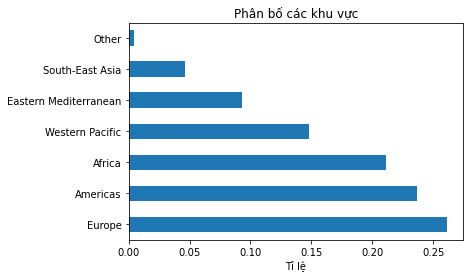

In [107]:
global_table_df['WHO Region'].value_counts(normalize = True).plot.barh()
plt.xlabel('Tỉ lệ')
plt.title('Phân bố các khu vực');

<hr style="border:1px solid blue"> </hr>

## Khám phá dữ liệu tình hình COVID-19 theo ngày

### Đọc dữ liệu từ file

- Đọc dữ liệu từ file `WHO-COVID-19-global-data.csv` rồi lưu vào dataframe `global_df`.
- Mỗi quốc gia được thống kê trong nhiều ngày, ta nên để index là `số dòng`

In [108]:
global_df = pd.read_csv('dataset/WHO-COVID-19-global-data.csv')
global_df.tail()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
166132,2021-11-29,ZW,Zimbabwe,AFRO,40,133991,0,4705
166133,2021-11-30,ZW,Zimbabwe,AFRO,235,134226,1,4706
166134,2021-12-01,ZW,Zimbabwe,AFRO,426,134652,1,4707
166135,2021-12-02,ZW,Zimbabwe,AFRO,685,135337,0,4707
166136,2021-12-03,ZW,Zimbabwe,AFRO,1042,136379,0,4707


### Dữ liệu có bao nhiêu dòng và cột ?

Tính số dòng và số cột rồi lưu vào biến `num_rows_global` và `num_cols_global`

In [109]:
num_rows_global , num_cols_global = global_df.shape
print(f'Dữ liệu có {num_rows_global} dòng')
print(f'Dữ liệu có {num_cols_global} cột')

Dữ liệu có 166137 dòng
Dữ liệu có 8 cột


### Mỗi dòng dữ liệu có ý nghĩa gì ? Có vấn đề các dòng có ý nghĩa khác nhau không ?

Theo quan sát sơ bộ và file mô tả dữ liệu trên website chính của WHO thì dữ liệu cho biết thông tin về tính hình COVID-19 hằng ngày của từng quốc gia. \
Có vẻ không có vấn đề về ý nghĩa từng dòng.

### Dữ liệu có bị lặp không

Tính số dòng dữ liệu bị trùng (nếu có) rồi lưu vào biến `num_rows_dupicated`.

In [110]:
num_rows_duplicated = num_rows_global - len(global_df.drop_duplicates())
print(num_rows_duplicated)

0


### Mỗi cột có ý nghĩa gì ?

Dựa vào mô tả chính thức trên website WHO, em đã mô tả ý nghĩa từng cột dữ liệu trong file `description_global.csv`

In [111]:
pd.set_option("display.max_colwidth",500)
description_global = pd.read_csv('dataset/Description-global.csv',
                                 delimiter= '\t',index_col= 'Field name')

In [112]:
description_global

,Type,Description
Field name,,
Date_reported,Date,Date of reporting to WHO
Country_code,String,ISO Alpha-2 country code
Country,String,"Country, territory, area"
WHO_region,String,"WHO regional offices: WHO Member States are grouped into six WHO regions -- Regional Office for Africa (AFRO), Regional Office for the Americas (AMRO), Regional Office for South-East Asia (SEARO), Regional Office for Europe (EURO), Regional Office for the Eastern Mediterranean (EMRO), and Regional Office for the Western Pacific (WPRO)."
New_cases,Integer,New confirmed cases. Calculated by subtracting previous cumulative case count from current cumulative cases count.*
Cumulative_cases,Integer,Cumulative confirmed cases reported to WHO to date.
New_deaths,Integer,New confirmed deaths. Calculated by subtracting previous cumulative deaths from current cumulative deaths.*
Cumulative_deaths,Integer,Cumulative confirmed deaths reported to WHO to date.


### Mỗi cột hiện tại đang có dữ liệu gì ?

In [113]:
global_df.dtypes

Date_reported        object
Country_code         object
Country              object
WHO_region           object
New_cases             int64
Cumulative_cases      int64
New_deaths            int64
Cumulative_deaths     int64
dtype: object

`Date_reported` nên có kiểu dữ liệu `datetime`

---
### Tiền xử lý: Thay đổi kiểu dữ liệu

In [114]:
global_df['Date_reported'] = pd.to_datetime(global_df['Date_reported'])

Vậy **Kiểu dữ liệu không có gì bất thường**

---
### Quay lại khám phá dữ liệu: Phân bố kiểu dữ liệu numerical

In [115]:
numerical_df = global_df.select_dtypes(['int64','float64','datetime64'])
numerical_df.agg([missing_ration,pd.Series.min,lower_quantile,
                  pd.Series.median,upper_quantile,pd.Series.max])

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
missing_ration,0.0,0.0,0.0,0.0,0.0
min,2020-01-03 00:00:00,-32952.0,0.0,-2371.0,0.0
lower_quantile,2020-06-26 00:00:00,0.0,69.0,0.0,0.0
median,2020-12-18 00:00:00,16.0,5906.0,0.0,91.0
upper_quantile,2021-06-11 00:00:00,402.0,102499.0,6.0,1761.0
max,2021-12-03 00:00:00,414188.0,48413265.0,8786.0,778336.0


- new_cases < 0 và new_death < 0 ???
    - new_cases = tổng số ca tích luỹ tới hôm nay - tổng số ca tích luỹ từ hôm trước
    - new_death = tổng số ca tích luỹ tới hôm nay - tổng số ca tích luỹ từ hôm trước.

Theo em thì do thông tin ngày hôm trước chưa chính xác nên sẽ được tính và trừ cho ngày hôm sau.\
Vậy không có gì bất thường

### Phân bố kiểu dữ liệu categorical

In [116]:
pd.set_option("display.max_colwidth",51)
categorical_df = global_df.select_dtypes(['object'])
categorical_df.agg([missing_ration,pd.Series.unique,pd.Series.nunique])

,Country_code,Country,WHO_region
missing_ration,0.4,0.0,0.0
unique,"[AF, AL, DZ, AS, AD, AO, AI, AG, AR, AM, AW, AU...","[Afghanistan, Albania, Algeria, American Samoa,...","[EMRO, EURO, AFRO, WPRO, AMRO, SEARO, Other]"
nunique,236,237,7


Vẽ `barh chart` cho `WHO Region`

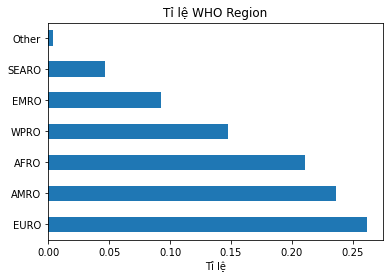

In [117]:
global_df['WHO_region'].value_counts(normalize=True).plot.barh()
plt.xlabel('Tỉ lệ')
plt.title('Tỉ lệ WHO Region');

`Bar chart` này có tỉ lệ khá tương quan với `Bar chart` mà ta đã khám phá ở phần trước đó. 

### Dữ liệu có dòng nào dư thừa hay không?

Các quốc gia khác nhau sẽ có thời điểm xuất hiện ca nhiễm đầu tiên khác nhau, vậy trước thời điểm này thì dữ liệu sẽ toàn `0`(số ca nhiễm, ca tử vong,...) không giúp ích cho việc hiểu dữ liệu. Vậy nên ta chỉ xét dữ liệu từ thời điểm xuất hiện ca nhiễm đầu tiên tới thời điểm cuối cùng thu thập được.
- Thay thế những giá trị bằng 0 thành NaN (dù sai với ý nghĩa nhưng ta sẽ loại bỏ những dòng này nên không sao.)
- Xoá những dòng chứa toàn NaN.

### Tiền xử lý : Giảm số lượng dòng

In [118]:
global_df = global_df.replace(0,np.nan)
global_df = global_df.dropna(how = 'all',subset = ['New_cases','Cumulative_cases',
                                   'New_deaths','Cumulative_deaths'])
global_df = global_df.reset_index().drop(columns='index')

Chúng ta đã giảm được một số lượng lớn những dòng dữ liệu vô nghĩa :))

### Tiền xử lý : Thêm cột Month vào Dataframe

Đôi khi ta sẽ phải thống kê số liệu theo từng tháng để thấy rõ đưa ra nhận xét. Do đó trước khi trả lời câu hỏi, ta sẽ thêm cột `Month` vào DataFrame.

In [119]:
Month = global_df['Date_reported'].dt.month
global_df['Month'] = Month

<hr style="border:1px solid blue"> </hr>

## Khám phá dữ liệu tình trạng tiêm chủng COVID-19 ở các quốc gia

### Đọc dữ liệu từ file

Đọc dữ liệu từ file `vaccination-data.csv` rồi lưu vào dataframe `vaccin_df`.

In [120]:
vaccin_df = pd.read_csv('dataset/vaccination-data.csv')
vaccin_df.sample(5)

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
105,Jordan,JOR,EMRO,REPORTING,2021-12-01,8008442,4144133.0,78.490,40.616,3755768.0,36.810,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-Co...",2021-01-13,6.0
91,Honduras,HND,AMRO,REPORTING,2021-12-03,9030824,4927085.0,91.178,49.745,3891577.0,39.291,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-Va...",2021-02-26,6.0
23,Bhutan,BTN,SEARO,REPORTING,2021-11-28,1153555,589215.0,149.500,76.362,564340.0,73.138,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-Co...",2021-03-27,5.0
95,Indonesia,IDN,SEARO,REPORTING,2021-11-30,234857452,139374391.0,85.864,50.955,95483061.0,34.909,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-Co...",2021-01-13,6.0
170,Russian Federation,RUS,EURO,OWID,2021-12-01,125594890,66201198.0,86.100,45.364,56114718.0,38.452,"SRCVB - EpiVacCorona, Gamaleya - Sputnik V",NaN,2.0


### Dữ liệu có bao nhiêu dòng và cột ?

Tính số dòng và số cột rồi lưu vào biến `num_rows_vaccin` và `num_cols_vaccin`

In [121]:
num_rows_vaccin , num_cols_vaccin = vaccin_df.shape
print(f'Dữ liệu có {num_rows_vaccin} dòng')
print(f'Dữ liệu có {num_cols_vaccin} cột')

Dữ liệu có 228 dòng
Dữ liệu có 14 cột


### Mỗi dòng dữ liệu có ý nghĩa gì ? Có vấn đề các dòng có ý nghĩa khác nhau không ?

Theo quan sát sơ bộ và file mô tả dữ liệu trên website chính của WHO thì dữ liệu cho biết thông tin về tính hình tiêm chủng của từng quốc gia với ngày cập nhật gần nhất.

### Dữ liệu có bị lặp không

Tính số dòng dữ liệu bị trùng (nếu có) rồi lưu vào biến `num_rows_dupicated`.

In [122]:
num_rows_duplicated = num_rows_vaccin - len(vaccin_df.drop_duplicates())
print(num_rows_duplicated)

0


### Mỗi cột có ý nghĩa gì ?

Dựa vào mô tả chính thức trên website WHO, ý nghĩa từng cột được mô tả trong file `Description_data.csv`

In [123]:
pd.set_option("display.max_colwidth",500)
description_data = pd.read_csv('dataset/Description_data.csv',
                                 delimiter= '\t',index_col= 'Field name')

In [124]:
description_data

,Type,Description
Field name,,
COUNTRY,String,"Country, territory, area"
ISO3,String,ISO Alpha-3 country code
WHO_REGION,String,"WHO regional offices: WHO Member States are grouped into six WHO regions: Regional Office for Africa (AFRO), Regional Office for the Americas (AMRO), Regional Office for South-East Asia (SEARO), Regional Office for Europe (EURO), Regional Office for the Eastern Mediterranean (EMRO), and Regional Office for the Western Pacific (WPRO)."
DATA_SOURCE,String,"Indicates data source: - REPORTING: Data reported by Member States, or sourced from official reports - OWID: Data sourced from Our World in Data: https://ourworldindata.org/covid-vaccinations"
DATE_UPDATED,Date,Date of last update
TOTAL_VACCINATIONS,Integer,Cumulative total vaccine doses administered
PERSONS_VACCINATED_1PLUS_DOSE,Decimal,Cumulative number of persons vaccinated with at least one dose
TOTAL_VACCINATIONS_PER100,Integer,Cumulative total vaccine doses administered per 100 population
PERSONS_VACCINATED_1PLUS_DOSE_PER100,Decimal,Cumulative persons vaccinated with at least one dose per 100 population


### Mỗi cột hiện tại đang có dữ liệu gì ?

In [125]:
vaccin_df.dtypes

COUNTRY                                  object
ISO3                                     object
WHO_REGION                               object
DATA_SOURCE                              object
DATE_UPDATED                             object
TOTAL_VACCINATIONS                        int64
PERSONS_VACCINATED_1PLUS_DOSE           float64
TOTAL_VACCINATIONS_PER100               float64
PERSONS_VACCINATED_1PLUS_DOSE_PER100    float64
PERSONS_FULLY_VACCINATED                float64
PERSONS_FULLY_VACCINATED_PER100         float64
VACCINES_USED                            object
FIRST_VACCINE_DATE                       object
NUMBER_VACCINES_TYPES_USED              float64
dtype: object

`DATE_UPDATED`, `FIRST_VACCINE_DATE` nên có kiểu dữ liệu `datetime`

---
### Tiền xử lý: Thay đổi kiểu dữ liệu

In [126]:
vaccin_df = vaccin_df.astype({'DATE_UPDATED': 'datetime64[ns]', 'FIRST_VACCINE_DATE': 'datetime64[ns]'})

In [127]:
assert vaccin_df['DATE_UPDATED'].dtype == np.dtype('datetime64[ns]')
assert vaccin_df['FIRST_VACCINE_DATE'].dtype == np.dtype('datetime64[ns]')

Vậy **Kiểu dữ liệu không có gì bất thường**

---
### Quay lại khám phá dữ liệu: Phân bố kiểu dữ liệu numerical

In [128]:
numerical_df = vaccin_df.select_dtypes(['int64','float64','datetime64'])
numerical_df.agg([missing_ration,pd.Series.min,lower_quantile,
                  pd.Series.median,upper_quantile,pd.Series.max])

,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
missing_ration,0.0,0.000000e+00,2.200000e+00,0.00000,2.2000,1.800000e+00,1.80000,8.8,1.3
min,2021-04-09 00:00:00,7.400000e+01,3.700000e+01,0.01300,0.0070,3.700000e+01,0.00700,2020-07-22 00:00:00,1.0
lower_quantile,2021-11-25 00:00:00,2.656605e+05,1.526895e+05,45.36700,26.9515,1.109355e+05,21.23675,2021-01-07 12:00:00,2.0
median,2021-11-28 00:00:00,1.802748e+06,1.070741e+06,98.37900,53.4740,8.130390e+05,44.96050,2021-02-17 00:00:00,4.0
upper_quantile,2021-12-01 00:00:00,1.154469e+07,6.329072e+06,142.65175,71.8095,5.107506e+06,65.75900,2021-03-15 00:00:00,5.0
max,2021-12-04 00:00:00,2.483096e+09,1.240357e+09,296.07000,121.6790,1.089827e+09,118.20100,2021-10-18 00:00:00,10.0


Vậy có 5 cột `PERSONS_VACCINATED_1PLUS_DOSE_PER100 	PERSONS_FULLY_VACCINATED 	PERSONS_FULLY_VACCINATED_PER100 	FIRST_VACCINE_DATE 	NUMBER_VACCINES_TYPES_USED` có giá trị `NaN`

---
### Tiền xử lí: Xử lí các thông tin chứa `NaN`

Kiểm tra những quốc gia nào có `NUMBER_VACCINES_TYPES_USED` là `NaN`

In [129]:
vaccin_df[vaccin_df['NUMBER_VACCINES_TYPES_USED'].isna()]

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
25,Bonaire,XAA,AMRO,REPORTING,2021-12-03,32084,16995.0,153.402,81.257,15089.0,72.144,NaN,NaT,NaN
172,Saba,XCA,AMRO,REPORTING,2021-12-03,3131,NaN,161.976,NaN,1557.0,80.548,NaN,NaT,NaN
186,Sint Eustatius,XBA,AMRO,REPORTING,2021-12-03,2963,1509.0,94.393,48.073,1454.0,46.320,NaN,NaT,NaN


Như ở trên ta thấy, những quốc gia này các thông tin về các thông tin về loại vaccin đều `NaN`, do đó có thể thông tin sẽ gây sai lệch khi tính toán chung, Nên nhóm em quyết định loại bỏ các dòng này.

In [130]:
vaccin_df = vaccin_df[~vaccin_df['NUMBER_VACCINES_TYPES_USED'].isna()]

Kiểm tra lại phân bổ các biến numerical. Ta thấy các cột `PERSONS_VACCINATED_1PLUS_DOSE`, `PERSONS_VACCINATED_1PLUS_DOSE_PER100`, `PERSONS_FULLY_VACCINATED`, `PERSONS_FULLY_VACCINATED_PER100` có cùng tỉ lệ `missing_ratio`. Vậy các thuộc tính này có thể `NaN` cùng nhau trên một số dòng nào đó. Do đó, em sẽ xem đó là những dòng nào và quyết định xem có nên loại bỏ chúng hay không

In [131]:
numerical_df = vaccin_df.select_dtypes(['int64','float64','datetime64'])
numerical_df.agg([missing_ration,pd.Series.min,lower_quantile,
                  pd.Series.median,upper_quantile,pd.Series.max])

,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
missing_ration,0.0,0.000000e+00,1.800000e+00,0.000,1.800,1.800000e+00,1.800,7.6,0.0
min,2021-04-09 00:00:00,7.400000e+01,3.700000e+01,0.013,0.007,3.700000e+01,0.007,2020-07-22 00:00:00,1.0
lower_quantile,2021-11-25 00:00:00,2.729200e+05,1.615210e+05,43.282,26.926,1.268890e+05,20.906,2021-01-07 12:00:00,2.0
median,2021-11-28 00:00:00,1.910830e+06,1.078240e+06,97.858,53.474,8.738020e+05,44.418,2021-02-17 00:00:00,4.0
upper_quantile,2021-12-01 00:00:00,1.199835e+07,6.329967e+06,141.400,71.786,5.340231e+06,65.569,2021-03-15 00:00:00,5.0
max,2021-12-04 00:00:00,2.483096e+09,1.240357e+09,296.070,121.679,1.089827e+09,118.201,2021-10-18 00:00:00,10.0


In [132]:
vaccin_df[vaccin_df['PERSONS_VACCINATED_1PLUS_DOSE'].isna()]

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
86,Guernsey,GGY,EURO,OWID,2021-11-22,104131,NaN,161.524,NaN,NaN,NaN,"Moderna - mRNA-1273, AstraZeneca - AZD1222, Pfizer BioNTech - Comirnaty",NaT,3.0
110,Kuwait,KWT,EMRO,REPORTING,2021-08-14,2668082,NaN,62.476,NaN,NaN,NaN,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfizer BioNTech - Comirnaty",2020-12-28,5.0
166,Qatar,QAT,EMRO,REPORTING,2021-12-01,4989421,NaN,173.180,NaN,NaN,NaN,"AstraZeneca - Vaxzevria,Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfizer BioNTech - Comirnaty",2020-12-23,4.0
216,United Arab Emirates,ARE,EMRO,REPORTING,2021-11-30,21871201,NaN,221.136,NaN,NaN,NaN,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid-Vac,Pfizer BioNTech - Comirnaty,SII - Covishield",2020-12-14,5.0


Như đã thấy, các dòng này chứa những giá trị NaN cùng nhau. Do đó, em sẽ loại bỏ  chúng. **NOTE**: trong 4 quốc gia này có tới 3 quốc gia thuộc `EMRO`, khồn biết có âm mưu gì không :3

In [133]:
vaccin_df = vaccin_df[~vaccin_df['PERSONS_VACCINATED_1PLUS_DOSE'].isna()]

In [134]:
numerical_df = vaccin_df.select_dtypes(['int64','float64','datetime64'])
numerical_df.agg([missing_ration,pd.Series.min,lower_quantile,
                  pd.Series.median,upper_quantile,pd.Series.max])

,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
missing_ration,0.0,0.000000e+00,0.000000e+00,0.000,0.000,0.000000e+00,0.000,7.2,0.0
min,2021-04-09 00:00:00,7.400000e+01,3.700000e+01,0.013,0.007,3.700000e+01,0.007,2020-07-22 00:00:00,1.0
lower_quantile,2021-11-25 00:00:00,2.729200e+05,1.615210e+05,43.246,26.926,1.268890e+05,20.906,2021-01-11 00:00:00,2.0
median,2021-11-28 00:00:00,1.875132e+06,1.078240e+06,96.403,53.474,8.738020e+05,44.418,2021-02-17 00:00:00,4.0
upper_quantile,2021-12-01 00:00:00,1.199835e+07,6.329967e+06,140.900,71.786,5.340231e+06,65.569,2021-03-15 00:00:00,5.0
max,2021-12-04 00:00:00,2.483096e+09,1.240357e+09,296.070,121.679,1.089827e+09,118.201,2021-10-18 00:00:00,10.0


OK. Mọi thứ trong có vẻ tốt hơn trước rồi. Còn cột `FIRST_VACCINE_DATE` với tỉ lệ `NaN` khá lớn, nhưng em nghĩ nó sẽ không ảnh hưởng đến **phần lớn** các câu hỏi và phân tích.

### Phân bố kiểu dữ liệu categorical

In [135]:
pd.set_option("display.max_colwidth",51)
categorical_df = vaccin_df.select_dtypes(['object'])
categorical_df.agg([missing_ration,pd.Series.unique,pd.Series.nunique])

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,VACCINES_USED
missing_ration,0.0,0.0,0.0,0.0,0.0
unique,"[Afghanistan, Albania, Algeria, American Samoa,...","[AFG, ALB, DZA, ASM, AND, AGO, AIA, ATG, ARG, A...","[EMRO, EURO, AFRO, WPRO, AMRO, SEARO, OTHER]","[REPORTING, OWID]","[Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2..."
nunique,221,221,7,2,119


Vẽ `barh chart` cho top 10 `VACCINES_USED`

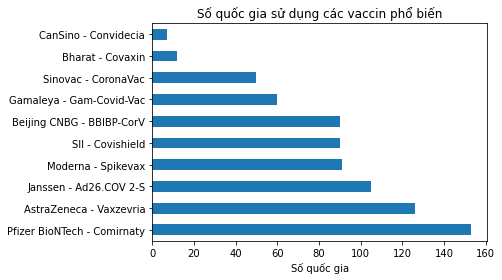

In [136]:
vaccin_df['VACCINES_USED'].str.split(',').explode().value_counts().head(10).plot.barh()
plt.xlabel('Số quốc gia')
plt.title('Số quốc gia sử dụng các vaccin phổ biến');

`Bar chart` này cho thấy Pfizer được sử dụng rộng rãi, bám theo sau là AstraZeneca.

<hr style="border:1px solid blue"> </hr>

## Khám phá dữ liệu Vaccin COVID-19

### Đọc dữ liệu từ file

Đọc dữ liệu từ file `vaccination-metadata.csv` rồi lưu vào dataframe `metavaccin_df`.

In [137]:
metavaccin_df = pd.read_csv('dataset/vaccination-metadata.csv')
metavaccin_df.sample(5)

,ISO3,VACCINE_NAME,PRODUCT_NAME,COMPANY_NAME,AUTHORIZATION_DATE,START_DATE,END_DATE,COMMENT,DATA_SOURCE
312,HND,Pfizer BioNTech - Comirnaty,Comirnaty,Pfizer BioNTech,NaN,NaN,NaN,NaN,REPORTING
117,PHL,Beijing CNBG - BBIBP-CorV,BBIBP-CorV,Beijing Bio-Institute Biological Products (CNBG),2021-06-07,2021-08-30,NaN,NaN,REPORTING
745,MAR,Janssen - Ad26.COV 2-S,Ad26.COV 2-S,Janssen Pharmaceuticals,NaN,NaN,NaN,NaN,REPORTING
157,ARG,AstraZeneca - Vaxzevria,Vaxzevria,AstraZeneca,2021-12-20,2021-03-30,NaN,NaN,REPORTING
65,GIN,Gamaleya - Gam-Covid-Vac,Gam-Covid-Vac,Gamaleya Research Institute,2021-01-27,2021-03-05,NaN,NaN,REPORTING


### Dữ liệu có bao nhiêu dòng và cột ?

Tính số dòng và số cột rồi lưu vào biến `num_rows_metavaccin` và `num_cols_metavaccin`

In [138]:
num_rows_metavaccin , num_cols_metavaccin = metavaccin_df.shape
print(f'Dữ liệu có {num_rows_metavaccin} dòng')
print(f'Dữ liệu có {num_cols_metavaccin} cột')

Dữ liệu có 853 dòng
Dữ liệu có 9 cột


### Mỗi dòng dữ liệu có ý nghĩa gì ? Có vấn đề các dòng có ý nghĩa khác nhau không ?

Theo quan sát sơ bộ và file mô tả dữ liệu trên website chính của WHO thì dữ liệu cho biết thông tin về tính hình sử dụng vaccin ở các quốc gia với ngày được cập nhật gần nhất.

### Dữ liệu có bị lặp không

Tính số dòng dữ liệu bị trùng (nếu có) rồi lưu vào biến `num_rows_dupicated`.

In [139]:
num_rows_duplicated = num_rows_metavaccin - len(metavaccin_df.drop_duplicates())
print(num_rows_duplicated)

0


### Mỗi cột có ý nghĩa gì ?

Dựa vào mô tả chính thức trên website WHO, ý nghĩa từng cột được mô tả trong file `Description_data.csv`

In [140]:
pd.set_option("display.max_colwidth",500)
description_data = pd.read_csv('dataset/Description_metadata.csv',
                                 delimiter= '\t',index_col= 'Field name')

In [141]:
description_data

,Type,Description
Field name,,
ISO3,String,ISO Alpha-3 country code
VACCINE_NAME,String,Combined short name of vaccine: âCompany - Product nameâ (see below)
PRODUCT_NAME,String,"Name or label of vaccine product, or type of vaccine (if unnamed)."
COMPANY_NAME,String,Marketing authorization holder of vaccine product.
AUTHORIZATION_DATE,Date,"Date vaccine product was authorised for use in the country, territory, area."
START_DATE,Date,Start/launch date of vaccination with vaccine type (excludes vaccinations during clinical trials).
END_DATE,Date,End date of vaccine rollout
COMMENT,String,Comments related to vaccine rollout
DATA_SOURCE,String,"Indicates data source - REPORTING: Data reported by Member States, or sourced from official reports - OWID: Data sourced from Our World in Data: https://ourworldindata.org/covid-vaccinations"


### Mỗi cột hiện tại đang có dữ liệu gì ?

In [142]:
metavaccin_df.dtypes

ISO3                   object
VACCINE_NAME           object
PRODUCT_NAME           object
COMPANY_NAME           object
AUTHORIZATION_DATE     object
START_DATE             object
END_DATE              float64
COMMENT               float64
DATA_SOURCE            object
dtype: object

`AUTHORIZATION_DATE`, `START_DATE`, `END_DATE`  nên có kiểu dữ liệu `datetime`\
`COMMENT` nên có dữ liệu là `object`

---
### Tiền xử lý: Thay đổi kiểu dữ liệu

In [143]:
metavaccin_df = metavaccin_df.astype({'AUTHORIZATION_DATE': 'datetime64[ns]', 'START_DATE': 'datetime64[ns]',\
                                      'END_DATE': 'datetime64[ns]', 'COMMENT': 'str'})

In [144]:
assert metavaccin_df['AUTHORIZATION_DATE'].dtype == np.dtype('datetime64[ns]')
assert metavaccin_df['START_DATE'].dtype == np.dtype('datetime64[ns]')
assert metavaccin_df['END_DATE'].dtype == np.dtype('datetime64[ns]')
assert metavaccin_df['COMMENT'].dtype == np.dtype('object')

Vậy **Kiểu dữ liệu không có gì bất thường**

---
### Quay lại khám phá dữ liệu: Phân bố kiểu dữ liệu numerical

In [145]:
numerical_df = metavaccin_df.select_dtypes(['int64','float64','datetime64'])
numerical_df.agg([missing_ration,pd.Series.min,lower_quantile,
                  pd.Series.median,upper_quantile,pd.Series.max])

/home/lav/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,AUTHORIZATION_DATE,START_DATE,END_DATE
missing_ration,59.3,33.9,100.0
min,2020-07-22 00:00:00,2020-07-22 00:00:00,NaT
lower_quantile,2021-01-29 12:00:00,2021-02-03 00:00:00,NaT
median,2021-02-24 00:00:00,2021-03-10 00:00:00,NaT
upper_quantile,2021-05-06 00:00:00,2021-04-28 00:00:00,NaT
max,2021-12-31 00:00:00,2021-11-14 00:00:00,NaT


Vậy `END_DATE` chứa toàn rỗng. Nên ta sẽ loại bỏ

---
### Tiền xử lí: Loại bỏ cột NaN

In [146]:
metavaccin_df = metavaccin_df.drop(columns=['END_DATE'])

In [147]:
assert 'END_DATE' not in metavaccin_df.columns

---
### Quay lại khám phá: Phân bố kiểu dữ liệu categorical

In [148]:
pd.set_option("display.max_colwidth",51)
categorical_df = metavaccin_df.select_dtypes(['object'])
categorical_df.agg([missing_ration,pd.Series.unique,pd.Series.nunique])

,ISO3,VACCINE_NAME,PRODUCT_NAME,COMPANY_NAME,COMMENT,DATA_SOURCE
missing_ration,0.0,0.0,0.0,0.5,0.0,0.0
unique,"[JEY, GGY, SHN, RUS, IMN, GIB, GRL, FRO, TUR, F...","[Moderna - mRNA-1273, AstraZeneca - AZD1222, Pf...","[mRNA-1273, AZD1222, Comirnaty, EpiVacCorona, C...","[Moderna, AstraZeneca, Pfizer BioNTech, State R...",[nan],"[OWID, REPORTING]"
nunique,225,25,24,19,1,2


Vẽ `barh chart` cho top 10 `COMPANY_NAME`

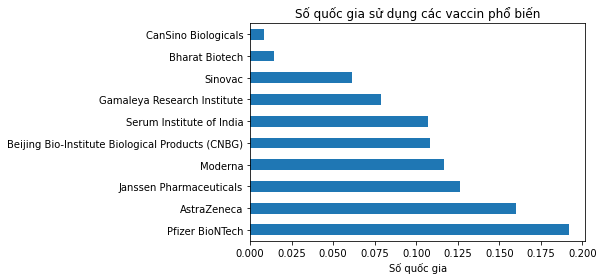

In [149]:
metavaccin_df['COMPANY_NAME'].value_counts(normalize=True).head(10).plot.barh()
plt.xlabel('Số quốc gia')
plt.title('Số quốc gia sử dụng các vaccin phổ biến');

`Bar chart` này cho thấy sự hợp lí khi Pfizer BioNTech và AstraZeneca tiếp tục đứng đầu.

---

# Đưa ra các câu hỏi cần trả lời

## Các vấn đề về dịnh bệnh covid

Sau khi khám phá để hiểu hơn về dữ liệu cùng như tin tức qua mạng xã hội, báo chí,... Ta có một vài vấn đề cần kiểm chứng và đi sâu hơn vào khám phá: 
- Năm `2020` là năm mà đại dịch covid-19 lây lan nhanh chóng ở các quốc gia ở `Châu Âu, Mỹ Latin` trước khi vacxin được phổ biến và dịch bệnh tạm kiềm chế vào đầu năm 2021. 
- Trong khi đó, năm `2021` lại là năm mà dịch covid-19 lây lan với mức độ khủng khiếp ở các nước `châu Á`.
- Mỹ là quốc gia có số ca nhiễm và tử vong cao nhất; tiếp đến là Ấn Độ, Brazil...
- Dịch bệnh covid_19 có khả năng bùng phát mạnh vào mùa lạnh.
- Dịch bệnh covid_19 ở Việt Nam trong giai đoạn 4 bùng phát rất mạnh, tính từ 05/2021

Vậy ta sẽ trả lời những câu hỏi sau để kiểm chứng những nhận định trên:

>1. Tình hình dịch bệnh ở các khu vực trên thế giới trong hai năm 2020,2021.
>2. Tình hình dịch bệnh ở nước có số ca nhiễm cao nhất thế giới, cao thứ hai thế giới,...\
Xác định đỉnh điểm của dịch tại các quốc gia trên rồi liên hệ với điều kiện khí hậu tại thời điểm đó.
>3. Tình hình dịch bệnh ở Việt Nam thay đổi như thế nào đến trước và sau `01/05/2021`. 

## Các vấn đề về vaccine

Dựa vào thông tin dữ liệu về vacinne mà em đã khám phá trước đó, đây là 2 câu hỏi mà em nghĩ dữ liệu sẽ đủ để trả lời.

> 4. Tình hình tiêm chủng giữa các quốc gia.
> 5. Độ phổ biến của top 5 loại vaccin phổ biến qua từng thời điểm.

Các câu hỏi trên nhằm trả lời các mục đích sau:
- Qua tình hình tiêm chủng giữa các quốc gia. Ta nhìn được sự phân bố vaccin giữa các nước, sau đó có thể rút được các quy luật nào không. \
    **Ví dụ:** nước tự do thì không tiêm vaccin, nước độc tài thì tỉ lệ tiêm cao, nước nghèo không tiếp cận được vaccin .. vv... Bên cạnh đó, việc trả lời câu hỏi này cũng giúp chúng ta biết nên đi du lịch nước nào vời thời điểm này 😄
- Khi trả lời được câu hỏi thứ 5, chúng ta sẽ biết được tốc độ phủ vaccin của các loại vaccin. Và sẽ có được cái nhìn tổng quan hơn về tình hình sử dụng vaccin trên thế giới.

---
# Tiền xử lý + Phân tích dữ liệu

- Tỉ số <font size = '4'>$\frac{\text{total_deaths}}{\text{total_ cases}}$</font> rất quan trọng trong việc đánh giá mức độ ảnh hưởng của dịch bệnh covid-19 tới một quốc gia. Ta sẽ thêm vào DataFrame `global_table_df` cột `covid_rating`.


- Đối với quốc gia chưa có ca nhiễm hay tử vong thì tỉ lệ này là `NaN` nên chúng ta sé gán lại bằng 0.

In [150]:
global_table_df['covid_rating'] = (global_table_df['Deaths - cumulative total'] \
                                 / global_table_df['Cases - cumulative total']) * 100

global_table_df.loc[global_table_df['covid_rating'].isna(),'covid_rating'] = 0

---
## Câu hỏi số 1: Tình hình dịch bệnh ở các khu vực trên thế giới trong hai năm 2020, 2021 ?

Để trả lời câu hỏi này, ta có các bước sau:
- Bước 1: Thêm cột `Year` vào DataFrame `global_df`
- Bước 2: merge WHO Region 2 DataFrame `global_df` và `global_table_df` theo tên quốc gia. WHO Region rút gọn sẽ gây khó hiểu cho người đọc.
- Bước 3: Lưu vào dataframe `areas_covid_19` gồm 7 dòng và 4 cột. 
    - Mỗi dòng tương ứng với 1 khu vực theo phân chia của WHO
    - Mỗi cột tương ứng là số ca mắc mới và số ca tử vong của từng khu vực trong 2 năm 2020, 2021
- Bước 4: Vẽ bar chart `tỉ lệ %` từng khu vực theo số ca nhiễm và tử vong, từ đó đưa ra nhận xét

**Code bước 1**

In [151]:
Year = global_df["Date_reported"].dt.year
global_df["Year"] = Year

**Code bước 2**

In [152]:
df1 = global_df[['Country','WHO_region','Year','New_cases','New_deaths']]
df2 = global_table_df[['WHO Region']]

# merge theo cột 'Name' của global_table_df và cột 'Country' của global_df
df = df2.merge(df1,left_on = 'Name',right_on = 'Country').drop(columns = ['WHO_region'])

**Code bước 3**

In [153]:
areas_covid_19 = df.groupby(["WHO Region","Year"]).sum()
areas_covid_19 = areas_covid_19.unstack(1)
areas_covid_19

New_cases             New_deaths           
Year                         2020        2021       2020       2021
WHO Region                                                         
Africa                  1895471.0   4421390.0    42211.0   110942.0
Americas               35734517.0  61591564.0   951786.0  1403842.0
Eastern Mediterranean   4912291.0  11902799.0   120880.0   189320.0
Europe                 27235606.0  60951030.0   583057.0   979147.0
Other                       745.0        19.0       13.0        0.0
South-East Asia        11973259.0  32632558.0   184188.0   524081.0
Western Pacific         1087675.0   9224698.0    20044.0   123051.0

**Code bước 4**

**1. Vẽ bar chart cho số ca nhiễm mới**

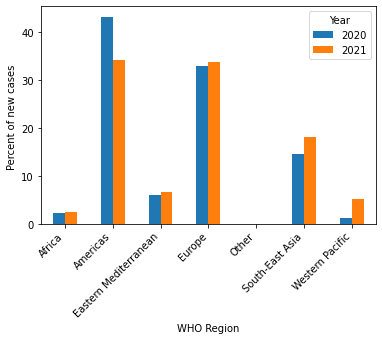

In [154]:
x_axis = areas_covid_19.index
y_axis_cases = (areas_covid_19.loc[:,('New_cases')] / areas_covid_19.loc[:,('New_cases')].sum()) * 100
y_axis_cases.plot.bar()
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.ylabel('Percent of new cases ');

**2. Vẽ bar chart cho số ca tử vong**

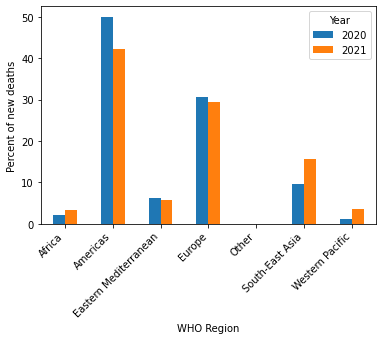

In [155]:
x_axis = areas_covid_19.index
y_axis_deaths = (areas_covid_19.loc[:,('New_deaths')] / areas_covid_19.loc[:,('New_deaths')].sum()) * 100
y_axis_deaths.plot.bar()
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.ylabel('Percent of new deaths');

Nhận xét: Hình vẽ biễu diễn khá trực quan về sự bùng phát dịch bệnh covid_19 ở từng khu vực trong năm 2020 và 2021
- Nhìn chung, năm 2020 đúng là năm dịch bệnh bùng phát mạnh ở châu Mỹ và Châu Âu, trong năm 2020 thì châu Mỹ đã chiếm gần 50% số tử vong và hơn 40 % số ca mắc trên thế giới.
- Riêng châu Mỹ thì qua năm 2021, số ca tử vong và ca nhiễm có xu hướng giảm nhưng vẫn còn khá cao so với khu vực khác.
- Năm 2021 thì châu Á, đặc biệt khu vực `Đông Nam Á` dịch bệnh bùng phát mạnh. Châu Âu thì tỉ lệ thay đổi không quá nhiều. 

👍👍👍

---
## Câu hỏi số 2: Tình hình dịch covid 19 diễn biến xấu nhất ở những quốc gia nào ? Có mối liên hệ giữa thời gian dịch đạt đỉnh với khí hậu hay không ?


Ta chia câu hỏi trên làm 2 phần:
- Phần 1: Xác định quốc gia nào có số ca nhiễm cao nhất, quốc gia nào có số ca nhiễm cao nhì,...
    - Bước 1: Lưu vào DataFrame `highest_case_country` gồm 10 quốc gia có số ca nhiễm cao nhất. \
      Chúng ta sẽ không xét dòng index `Global` 
    - Bước 2: Vẽ radar chart `tỉ lệ` các thông số 2 quốc gia đứng đầu, từ đó rút ra nhận xét.
        - Chuẩn hoá dữ liệu về tỉ lệ.
        - Vẽ `radar chart`.
- Phần 2: Xác định đỉnh dịch ở Mỹ và Ấn Độ rồi liên hệ với thời tiết.
    - Bước 1: Lưu vào DataFrame `covid_19_monthly`
        - Tên dòng phân cấp theo thứ tự: tên quốc gia , Month
        - Tên cột phân cấp theo thứ tự: new_cases / new_deaths, Year
    - Bước 2: 
        - Vẽ `line chart` số ca nhiễm mới và số ca tử vong
        - Vẽ `pie chart` tỉ lệ số ca nhiễm theo mùa, từ đó rút ra rút ra nhận xét

---
### Xác định các quốc gia có số ca nhiễm cao.

**Code bước 1**

In [156]:
highest_case_country = global_table_df.drop(index = ['Global'])
highest_case_country = highest_case_country.sort_values(by = ['Cases - cumulative total'],
                                                        ascending = False).head(10)
highest_case_country.head(5)

,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours,covid_rating
Name,,,,,,,,,,,,
United States of America,Americas,48413265,14626.247,605870,183.041,131187,778336,235.145,6388,1.930,1831,1.607692
India,South-East Asia,34615757,2508.380,60326,4.371,9216,470115,34.066,2647,0.192,391,1.358095
Brazil,Americas,22105872,10399.855,62760,29.526,11413,614964,289.314,1625,0.764,283,2.781903
The United Kingdom,Europe,10329078,15215.328,307577,453.079,53067,145281,214.007,848,1.249,141,1.406524
Russian Federation,Europe,9736037,6671.513,233158,159.769,32930,278857,191.084,8565,5.869,1217,2.864174


- Có thể thấy 3 quốc gia đứng đầu về số ca mắc lần lượt là `Mỹ`, `Ấn Độ` và `Brazil`. 👍👍👍
- Brazil và Russian có số ca nhiễm thấp hơn nhưng tỉ lệ tử vong lại rất cao. 😥😥😥

**Code bước 2**

1. Chuẩn bị dữ liệu và chuẩn hoá về tỉ lệ

In [157]:
# tên các cột cần cột xét
categorical = ['Cases - total', 'Cases - last 7days', 
               'Cases - last 24h','Deaths - total', 
               'Deaths - last 7days','Deaths - last 24h','Covid_rating']

# dữ liệu cần xét
data = highest_case_country.head(2)[['Cases - cumulative total',
                                     'Cases - newly reported in last 7 days',
                                     'Cases - newly reported in last 24 hours',
                                     'Deaths - cumulative total',
                                     'Deaths - newly reported in last 7 days',
                                     'Deaths - newly reported in last 24 hours',
                                     'covid_rating']]

# chuẩn hoá các cột về tỉ lệ  
data /= data.sum(axis = 0)

# tạo ra các cung tròn bằng nhau để vẽ radar chart
angles = [n / float(len(categorical)) * 2 * math.pi for n in range(len(categorical))]
angles += angles[:1] # đường cuối của radar chart

scale_America = data.iloc[0].values.tolist()
scale_America.append(scale_America[0])  # thêm đường cuối của radar chart
scale_India = data.iloc[1].values.tolist()
scale_India.append(scale_India[0])

2. Vẽ radar chart

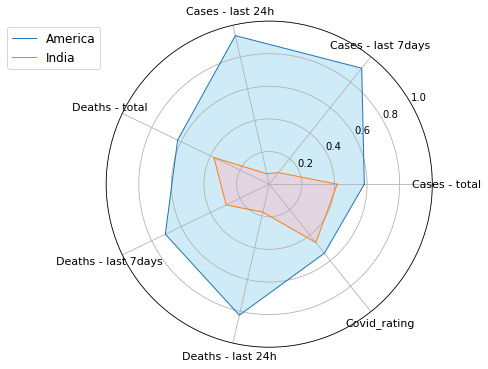

In [158]:
# tạo khung tròn kích thước 6x6
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6),
                       subplot_kw = dict(polar=True))
# Figure 1: 
# draw
ax.plot(angles,scale_America,linewidth = 1,
       linestyle = 'solid' , label = 'America')
# fill màu
ax.fill(angles, scale_America, 'skyblue', alpha=0.4)

# Figure 2:
# draw
ax.plot(angles,scale_India,linewidth = 1,
       linestyle = 'solid' , label = 'India')
# fill màu
ax.fill(angles, scale_India, 'lightpink', alpha=0.4)

# setup
plt.ylim(0, 1)
plt.xticks(angles[:-1], categorical,
           color='black', size = 11)
plt.legend( bbox_to_anchor = (0,1),   # bbox_to_anchor set possion of legend
            prop={'size': 12})        # set size of legend
ax.set_rlabel_position(30)            # set rotation of label scale

plt.show()

**Nhận xét:**
- Các thông số của Mỹ đều `rất cao` và `phân bố khá đều` ở tất cả các thông số so với Ấn Độ.
- Trong khi đó, Ấn Độ lại lệch về `tổng số ca nhiễm` và các thông số về `số ca tử vong`.
- Tỉ lệ tử vong của Ấn Độ khá cao, gần xấp xỉ với Mỹ mặc dù Mỹ có số ca nhiễm, số ca tử vong cao hơn.

---
### Xác định đỉnh dịch tại Mỹ và Ấn Độ

**Code bước 1**

In [159]:
df = global_df[(global_df['Country'] == 'United States of America') 
               | (global_df['Country'] == 'India')]

df = df[['Country','New_cases','New_deaths','Month','Year']]
df = df.groupby(['Country','Year','Month']).sum()
covid_19_monthly = df.unstack(level = 1)

covid_19_monthly.head(5)

New_cases            New_deaths          
Year               2020       2021       2020      2021
Country Month                                          
India   1           5.0   479509.0        0.0    5536.0
        2           2.0   350548.0        0.0    2777.0
        3        1244.0  1052604.0       32.0    5417.0
        4       31799.0  6613641.0     1042.0   45862.0
        5      149093.0  9284558.0     4090.0  120770.0

**Code bước 2**

#### **Tại Mỹ**

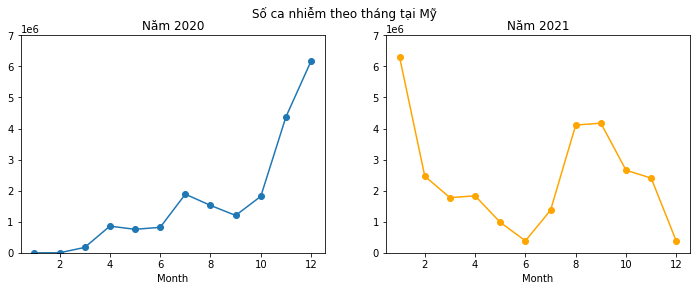

In [160]:
fig, axs = plt.subplots(1,2,figsize = (12,4))

covid_19_monthly.loc['United States of America', 
                     ('New_cases',2020)].plot.line(marker = 'o',ax = axs[0])

covid_19_monthly.loc['United States of America', 
                     ('New_cases',2021)].plot.line(marker = 'o',color = 'orange',ax = axs[1])

axs[0].set_ylim(0,7e6)
axs[1].set_ylim(0,7e6)
plt.sca(axs[0])
plt.title('Năm 2020')
plt.sca(axs[1])
plt.title('Năm 2021')
plt.suptitle('Số ca nhiễm theo tháng tại Mỹ');

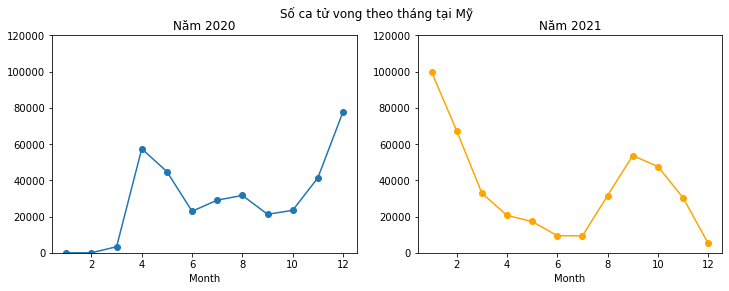

In [161]:
fig, axs = plt.subplots(1,2,figsize = (12,4))

covid_19_monthly.loc['United States of America', 
                     ('New_deaths',2020)].plot.line(marker = 'o',ax = axs[0])

covid_19_monthly.loc['United States of America', 
                     ('New_deaths',2021)].plot.line(marker = 'o',color = 'orange',ax = axs[1])

axs[0].set_ylim(0,1.2e5)
axs[1].set_ylim(0,1.2e5)
plt.sca(axs[0])
plt.title('Năm 2020')
plt.sca(axs[1])
plt.title('Năm 2021')
plt.suptitle('Số ca tử vong theo tháng tại Mỹ');

Nhận xét:
- Đỉnh dịch ở Mỹ rơi vào khoảng thời gian `11/2020 đến 02/2021`.
- Theo thông tin mà em biết thì khoảng thời gian này ở Mỹ rơi vào `cuối thu và mùa đông` <font size = '4'> $\rightarrow$ </font> Khí hậu rất lạnh. 👍👍👍

#### **Vẽ pie chart tình hình dịch bệnh tại Mỹ theo mùa**


Ở Mỹ có 4 mùa:
- Mùa xuân: 3-5 <font size = '4'> &#8594;</font> khí hậu ấm áp
- Mùa hè: 6-8 <font size = '4'> &#8594;</font> khí hậu nắng nóng
- Mùa thu: 9-11 <font size = '4'> &#8594;</font> khí hậu mát mẻ
- Mùa đông: 12-2 <font size = '4'> &#8594;</font> khí hậu lạnh

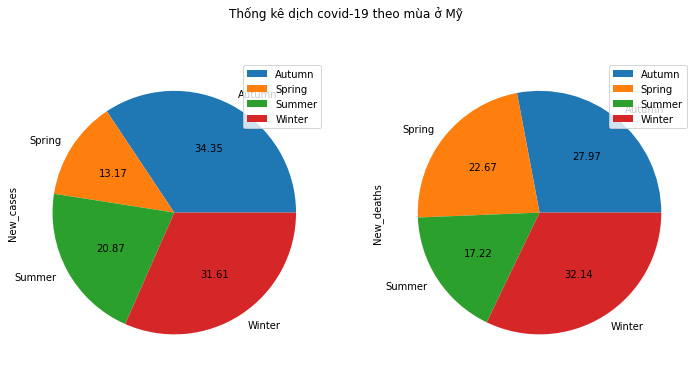

In [162]:
season_df = global_df[(global_df['Country'] == 'United States of America')]
season_df = season_df[['New_cases','New_deaths','Month']]

season_df.loc[(season_df['Month'] >= 3) & (season_df['Month'] < 6),['season']] = 'Spring'
season_df.loc[(season_df['Month'] >= 6) & (season_df['Month'] < 9),['season']] = 'Summer'
season_df.loc[(season_df['Month'] >= 9) & (season_df['Month'] < 12),['season']] = 'Autumn'
season_df.loc[(season_df['Month'] >= 12) | (season_df['Month'] < 3),['season']] = 'Winter'

season_df = season_df.drop(columns= ['Month'])
season_df = season_df.groupby('season').sum()
season_df.plot.pie(subplots = True, figsize = (12,6),autopct='%.2f')
plt.suptitle('Thống kê dịch covid-19 theo mùa ở Mỹ');

Nhận xét: 
- Dịch bệnh ở Mỹ bùng phát mạnh vào mùa thu đông, đặc biệt là vào mùa đông.

#### **Tại Ấn Độ**

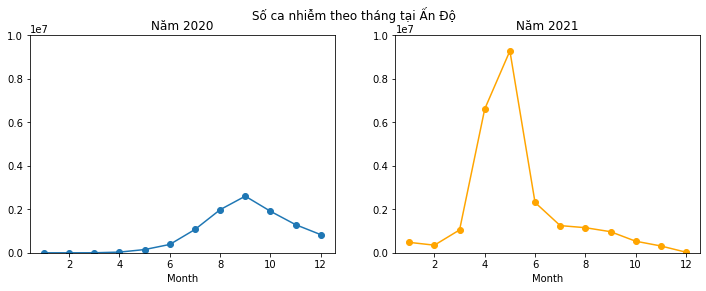

In [163]:
fig, axs = plt.subplots(1,2,figsize = (12,4))

covid_19_monthly.loc['India', 
                     ('New_cases',2020)].plot.line(marker = 'o',ax = axs[0])

covid_19_monthly.loc['India', 
                     ('New_cases',2021)].plot.line(marker = 'o',color = 'orange',ax = axs[1])

axs[0].set_ylim(0,1e7)
axs[1].set_ylim(0,1e7)
plt.sca(axs[0])
plt.title('Năm 2020')
plt.sca(axs[1])
plt.title('Năm 2021')
plt.suptitle('Số ca nhiễm theo tháng tại Ấn Độ');

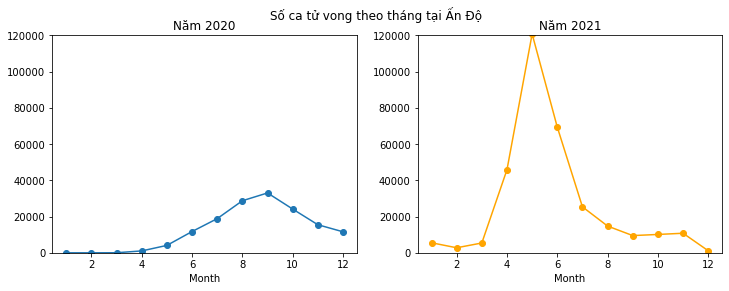

In [164]:
fig, axs = plt.subplots(1,2,figsize = (12,4))

covid_19_monthly.loc['India', 
                     ('New_deaths',2020)].plot.line(marker = 'o',ax = axs[0])

covid_19_monthly.loc['India', 
                     ('New_deaths',2021)].plot.line(marker = 'o',color = 'orange',ax = axs[1])

axs[0].set_ylim(0,1.2e5)
axs[1].set_ylim(0,1.2e5)
plt.sca(axs[0])
plt.title('Năm 2020')
plt.sca(axs[1])
plt.title('Năm 2021')
plt.suptitle('Số ca tử vong theo tháng tại Ấn Độ');

Nhận xét:
- Đỉnh dịch tại Ấn Độ rơi vào khoảng thời gian `04/2021 đến 06/2021`.
- Tại Ấn Độ thì đây đang là mùa hè <font size = '4'> &#8594;</font> Khí hậu rất nóng.
- Như vậy nhận định covid-19 phát triễn mạnh trong thời tiết lạnh chưa đúng cho Ấn Độ. Nhưng em nghĩ giữa covid-19 và thời tiết vẫn có mối liên hệ nhất định.

#### **Vẽ pie chart tình hình covid-19 theo mùa ở Ấn Độ**

Ở Ấn Độ có 4 mùa:
- Mùa đông: 12-2 <font size = '4'> &#8594;</font> khí hậu khá lạnh
- Mùa hè: 3-5 <font size = '4'> &#8594;</font> khí hậu nắng nóng
- Mùa mưa: 6-8 <font size = '4'> &#8594;</font> mưa nhiều, khá mát mẻ
- Mùa hậu mưa: 9-11 <font size = '4'> &#8594;</font> khí hậu mát mẻ

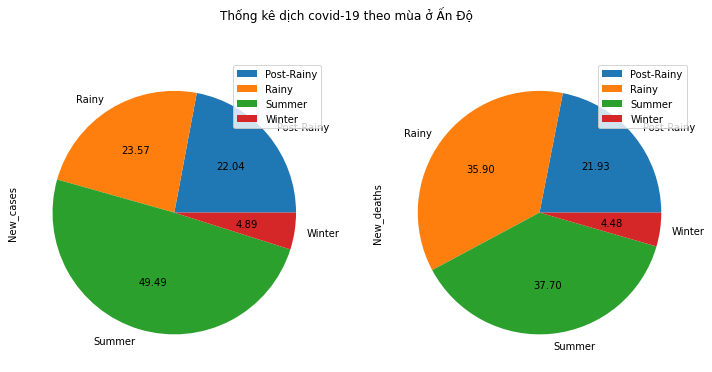

In [165]:
season_df = global_df[(global_df['Country'] == 'India')]
season_df = season_df[['New_cases','New_deaths','Month']]

season_df.loc[(season_df['Month'] >= 3) & (season_df['Month'] < 6),['season']] = 'Summer'
season_df.loc[(season_df['Month'] >= 6) & (season_df['Month'] < 9),['season']] = 'Rainy'
season_df.loc[(season_df['Month'] >= 9) & (season_df['Month'] < 12),['season']] = 'Post-Rainy'
season_df.loc[(season_df['Month'] >= 12) | (season_df['Month'] < 3),['season']] = 'Winter'

season_df = season_df.drop(columns= ['Month'])
season_df = season_df.groupby('season').sum()
season_df.plot.pie(subplots = True, figsize = (12,6),autopct='%.2f')
plt.suptitle('Thống kê dịch covid-19 theo mùa ở Ấn Độ');

Nhận xét:
- Khác với Mỹ, số ca nhiễm và tử vong ở Ấn Độ bùng phát mạnh vào mùa hè.

#### Dưới đây là một số nguyên nhân dịch bệnh bùng phát ở Ấn Độ do chúng em tìm hiểu và đưa ra:
- Dịch bệnh covid-19 biến đổi nhanh chóng để thích ứng với mọi kiểu khí hậu, thời tiết (Delta, Delta-plus,...)
- Sự chủ quan của người dân, hằng năm người Ấn Độ sẽ tổ chức `lễ hội tắm sông` Hằng từ `01/04 - 27/04`. 😥😥😥

---

## Câu hỏi số 3: Tình hình dịch bệnh covid-19 ở Việt Nam trước và sau 5/2021.

- Phần 1: Tình hình dịch covid-19 ở Việt Nam. Lưu kết quả vào DataFrame `vietnam_df`gồm
    - Các dòng phân cấp theo thứ tự: Year / Month
    - Các cột gồm số ca nhiễm mới, số ca tử vong và tỉ lệ tử vong.
- Phần 2: Chuẩn bị dữ liệu về tình hình dịch covid-19 ở Việt Nam trước và sau 05/2021.
    - Bước 1: Lưu kết quả trước 05/2021 vào DataFrame `before_df`
    - Bước 2: Lưu kết quả sau 05/2021 vào DataFrame `after_df`
- Phần 3: Trực quan hoá để nhận thấy sự khác biệt giữa 2 giai đoạn này.
    - Vẽ `line chart` cho số ca nhiễm và số ca tử vong.

### Tình hình dịch covid-19 ở Việt Nam

In [166]:
vietnam_df = global_df.loc[global_df['Country'] == 'Viet Nam',
                           ['New_cases','New_deaths','Year','Month']]
vietnam_df = vietnam_df.groupby(['Year','Month'])
vietnam_df = vietnam_df.sum()
vietnam_df.head()

New_cases  New_deaths
Year Month                       
2020 1            2.0         0.0
     2           14.0         0.0
     3          187.0         0.0
     4           67.0         0.0
     5           58.0         0.0

### Chuẩn bị dữ liệu tình hình trước và sau 05/2021.

**Code bước 1**

In [167]:
before_df = vietnam_df.loc[vietnam_df.index < (2021,5)]
before_cases = before_df['New_cases'].sum()
before_deaths = before_df['New_deaths'].sum()
before_rating = (before_deaths / before_cases)*100
print(f'Số ca nhiễm ở Việt Nam trước 05/2021: {before_cases}')
print(f'Số ca tử vong ở Việt Nam trước 05/2021: {before_deaths}')
print(f'Tỷ lệ tử vong ở Việt Name trước 05/2021: {before_rating.round(2)} %')

Số ca nhiễm ở Việt Nam trước 05/2021: 2914.0
Số ca tử vong ở Việt Nam trước 05/2021: 35.0
Tỷ lệ tử vong ở Việt Name trước 05/2021: 1.2 %


**Code bước 2**

In [168]:
after_df = vietnam_df.loc[vietnam_df.index >= (2021,5)]
after_cases = after_df['New_cases'].sum()
after_deaths = after_df['New_deaths'].sum()
after_rating = (after_deaths / after_cases)*100
print(f'Số ca nhiễm ở Việt Nam sau 05/2021: {after_cases}')
print(f'Số ca tử vong ở Việt Nam sau 05/2021: {after_deaths}')
print(f'Tỷ lệ tử vong ở Việt Nam sau 05/2021: {after_rating.round(2)} %')

Số ca nhiễm ở Việt Nam sau 05/2021: 1263374.0
Số ca tử vong ở Việt Nam sau 05/2021: 25623.0
Tỷ lệ tử vong ở Việt Nam sau 05/2021: 2.03 %


Nhận xét:
- Theo số liệu ta vừa tính toán được ở trên thì Việt Nam lúc này vẫn đang kiểm soát rất tốt dịch bệnh. 
- Đỉnh dịch ở Việt Nam trong gian đoạn này rơi vào 02/2020, 08/2020, 02/2021 <font size = '4'> &#8594; </font> tương ứng với 3 đợt dịch.
- Trước 05/2021, số ca nhiễm cao nhất trong 1 tháng chỉ hơn 600 ca, tỷ lệ tử vong và số ca tử vong ở mức thấp mặc dù tình hình dich bệnh trên thế giới đang rất phức tạp. 👍👍👍
- Sau 05/2021, số ca nhiễm và ca tử vong đã tăng đột biến, `tỷ lệ tử vong` của Việt Nam cũng cao hơn so với các nước top đầu về dịch covid-19. 😥😥😥

### Trực quan hoá

**Code bước 1**

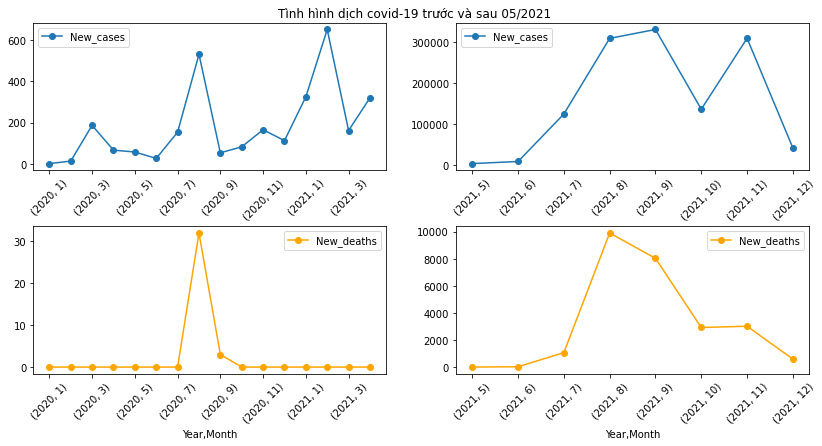

In [169]:
fig, axs = plt.subplots(2,2,figsize = (12,6))
before_df[['New_cases']].plot.line(marker = 'o',ax = axs[0,0])

after_df[['New_cases']].plot.line(marker = 'o',ax = axs[0,1])

before_df[['New_deaths']].plot.line(marker = 'o',
                                    ax = axs[1,0],color = 'orange')

after_df[['New_deaths']].plot.line(marker = 'o',
                                    ax = axs[1,1],color = 'orange')


fig.tight_layout(pad=2.5)  # khoảng cách giữa các figure
axs[0,0].tick_params(labelrotation=45, axis='x')
axs[0,1].tick_params(labelrotation=45, axis='x')
axs[1,0].tick_params(labelrotation=45, axis='x')
axs[1,1].tick_params(labelrotation=45, axis='x')
plt.suptitle('Tình hình dịch covid-19 trước và sau 05/2021');

# Shift + O : show full figures in cell output

### Chúng ta sẽ quan sát đỉnh dịch của Việt Nam sẽ rơi vào tháng nào ? 

Nhận xét:
- Dữ liệu chỉ thu thập đến hết ngày 03/12/2021 nên dữ liệu 12/2021 ở đây không có ỹ nghĩa so sánh nhưng ta thấy số ca nhiễm và tử vong vẫn cao hơn đầu dịch - 05/2021 và 06/2021.
- Đỉnh dịch ở Việt Nam rơi vào các 08/2021 , 09/2021 với hơn `300.000` ca nhiễm mỗi tháng, trung bình `10.000` ca nhiễm mỗi ngày.
- Số ca tử vong tăng nhanh trong thời gian ngắn - hơn `25.000` ca so với `35` ca tử vong trước đó 

## Câu hỏi số 4: Tình hình tiêm chủng giữa các quốc gia.

Ở câu hỏi này em sẽ phân tích các thuộc tính sau:
- Tỉ lệ người tiêm trên 1 mũi vaccine `PERSONS_FULLY_VACCINATED_PER100`
- Tỉ lệ người tiêm trên 2 mũi vaccine `PERSONS_VACCINATED_1PLUS_DOSE_PER100`

**Các bước phân tích câu hỏi:**
1. Tiền xử lí:
    - Lấy dataframe chứa 4 thuộc tính `ISO3`, `PERSONS_FULLY_VACCINATED_PER100`, `PERSONS_VACCINATED_1PLUS_DOSE_PER100`
    - Kiểm tra các điều kiện như: các cột rate thì không đuợc quá 100 và bé hơn 0.
    - Giá trị cột `FULL` sẽ không thể lớn hơn giá trị `1PLUS`.
    - Không chứa giá  trị nan
    - Nếu dữ liệu nào vi phạm thì sẽ bị loại bỏ.
2. Phân tích phân phối dữ liệu
    - Thống kê các thông số thống kê cơ bản
    - Visualize biểu đồ `histogram` của 2 dữ liệu trên
3. Phân tích tổng quan tình hình tiêm chủng giữa các quốc gia
    - Lấy dữ liệu location của các nước trên thế giới. Dữ liệu được cung cấp bởi [folium](https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json).
    - Vẽ `Choropleth map` cho dữ liệu `PERSONS_FULLY_VACCINATED_PER100`. Lý do chỉ chọn 1 thuộc tính bởi cả 2 dữ liệu trên khá tương đồng với nhau, chỉ cần 1 thuộc tính cũng sẽ nhìn được sự tương quan giữa các nước.
4. Nhận xét kết quả

### Tiền xử lí dữ liệu

In [170]:
# Tạo Dataframe
vaccin_region_df = vaccin_df[['ISO3' , 'PERSONS_FULLY_VACCINATED_PER100',\
                             'PERSONS_VACCINATED_1PLUS_DOSE_PER100']]

In [171]:
# Tìm kiếm outlier
outlier = vaccin_region_df[(vaccin_region_df['PERSONS_VACCINATED_1PLUS_DOSE_PER100'] > 100) |
                 (vaccin_region_df['PERSONS_FULLY_VACCINATED_PER100'] > 100) |
                 (vaccin_region_df['PERSONS_FULLY_VACCINATED_PER100'] > \
                vaccin_region_df['PERSONS_VACCINATED_1PLUS_DOSE_PER100'])]
outlier

,ISO3,PERSONS_FULLY_VACCINATED_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100
79,GIB,118.201,121.679
191,SOM,4.445,4.270
217,TZA,1.647,0.591


In [172]:
# Loại bỏ outlier
vaccin_region_df = vaccin_region_df.drop(index=outlier.index)

In [173]:
# Kiểm tra lại
assert len(vaccin_region_df[(vaccin_region_df['PERSONS_VACCINATED_1PLUS_DOSE_PER100'] > 100) |
                 (vaccin_region_df['PERSONS_FULLY_VACCINATED_PER100'] > 100) |
                 (vaccin_region_df['PERSONS_FULLY_VACCINATED_PER100'] > \
                vaccin_region_df['PERSONS_VACCINATED_1PLUS_DOSE_PER100'])]) == 0

### Phân tích phân phối dữ liệu

#### **Thống kê cơ bản**

In [174]:
# Thống kê cơ bản
vaccin_region_df.describe()

,PERSONS_FULLY_VACCINATED_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100
count,218.000000,218.000000
mean,42.600252,49.165362
std,25.908668,26.669541
min,0.007000,0.007000
25%,21.501500,27.023000
50%,44.557500,53.484500
75%,65.513250,71.774000
max,86.580000,98.994000


2 tỉ lệ trên khá tương tự nhau cả về giá trị và độ chênh lệch giữa các thông số.

#### **Visualize biểu đồ histogram**

In [175]:
# Lấy dữ liệu
full_rate = vaccin_region_df['PERSONS_FULLY_VACCINATED_PER100']
oneplus_rate = vaccin_region_df['PERSONS_VACCINATED_1PLUS_DOSE_PER100']

In [176]:
# Lấy min, max chung của 2 series
bins = 20
rate_max = max(full_rate.max(), oneplus_rate.max())
rate_min = min(full_rate.min(), oneplus_rate.min())

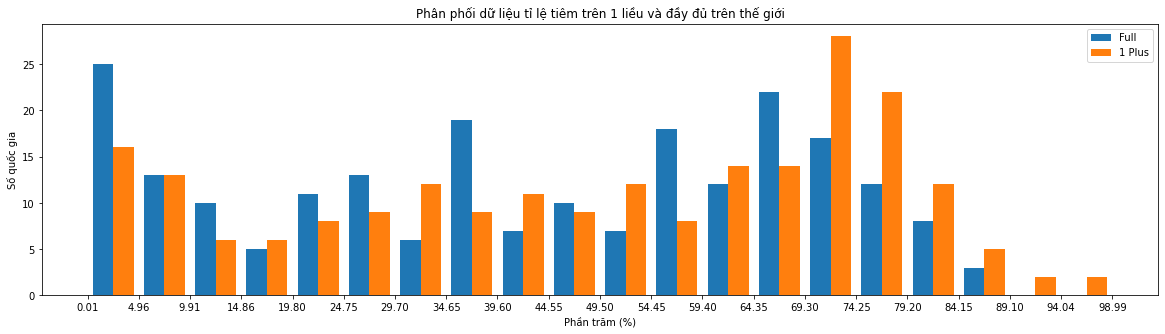

In [197]:
# Visualize 
plt.figure(figsize=(20,5))
plt.hist([full_rate, oneplus_rate], bins=bins, label=['Full', '1 Plus'])
plt.xticks(np.linspace(rate_min, rate_max, bins + 1))
plt.ylabel("Số quốc gia")
plt.xlabel("Phần trăm (%)")
plt.title("Phân phối dữ liệu tỉ lệ tiêm trên 1 liều và đầy đủ trên thế giới")
plt.legend();

2 Dữ liệu có độ phân phối đồng đều với nhau, cùng tăng và cùng giảm.

---

#### **Tổng quan tình hình tiêm chủng giữa các quốc gia**

In [178]:
# Lấy dữ liệu lacation
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/world-countries.json"

In [179]:
# Vẽ Chropleth Map
m = folium.Map()

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=vaccin_region_df,
    columns=["ISO3", "PERSONS_FULLY_VACCINATED_PER100"],
    key_on="feature.id",
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    nan_fill_color='white',
    bins=9,
    legend_name="Person Full Vaccinated Rate",
).add_to(m)

folium.LayerControl().add_to(m)

m

### Nhận xét kết quả

Qua phân tích trên, em rút ra các nhận xét sau:
- Tình hình tiêm chủng trên thế giới có vẻ khả quan, số liều vaccin trung bình chiếm khoảng 50% dân số.
- Tuy nhiên, ở biều đồ `Histogram` cũng cho thấy có thể chia các nước thành 3 nhóm:
  1. Tỉ lệ tiêm chủng rất thấp, chỉ đạt mức 0 - 5 %
  2. Tỉ lệ tiêm chủng trung bình, đặt mức 34 - 39%
  3. Tỉ lệ tiêm chủng rất cao, đạt mức 70 - 80%
- Có những nước có tỉ lệ tiêm trên 1 mũi đạt tận 95 - 98%
- Qua biểu đồ `Chorepleth map`, ta sẽ nhìn được 3 nhóm nước mà em đã phân ở ý thứ 2.
  1. Các nước thuộc Châu Phi tỉ lệ tiêm rất thấp.
  2. Các nước có tỉ lệ tiêm trung bình nằm ở Đông Nam Á, Trung Á, và vùng Caribe.
  3. Các nước có tỉ lệ tiêm cao nằm ở Châu Âu, Đông Á, Bắc Mỹ và một số nước Nam Mỹ

---

## Câu hỏi số 5: Độ phổ biến của top 5 loại vaccine dẫn đầu qua từng thời điểm

Các bước phân tích dữ liệu
1. Tiền xử lí dữ liệu
    -  Lấy các giá trị `ISO3`, `VACCINE_NAME`, `START_DATE` từ Dataframe `metavaccin_df`
    -  Loại bỏ nan ở cột `START_DATE`
    -  Trích thông tin Năm - Tháng của cột `START_DATE`
2. Phân tích dữ liệu
    -  Gom nhóm dữ liệu, mỗi dòng là 1 tháng, mỗi cột là 1 loại vaccine. Ý nghĩa là số quốc gia **mới** sử dụng loại vaccine đó.
    -  Thay giá trị NaN bằng 0.
    -  Tính tích lũy tổng số quốc gia đã sử dụng vaccine đó.
3. Visualize bằng `bar_chart_race`
4. Nhận xét

### Tiền xử lí dữ liệu

In [180]:
# Bước 1 & 2. 
type_vaccine =  metavaccin_df.dropna(subset=['START_DATE'])[['ISO3', 'VACCINE_NAME', 'START_DATE']]

In [181]:
# Trích thông tin Năm - Tháng
type_vaccine['MONTH'] =  type_vaccine['START_DATE'].dt.strftime("%Y-%m")
type_vaccine.head()

,ISO3,VACCINE_NAME,START_DATE,MONTH
23,CHN,Anhui ZL - Recombinant,2021-03-17,2021-03
24,UZB,Anhui ZL - Recombinant,2021-04-28,2021-04
25,CHN,Shenzhen - LV-SMENP-DC,2021-06-01,2021-06
29,CHN,IMB - Inactivated,2021-06-09,2021-06
30,TKM,Gamaleya - Gam-Covid-Vac,2021-02-24,2021-02


### Phân tích dữ liệu

In [182]:
# Gom nhóm dữ liệu
new_country_month =  type_vaccine.groupby(['MONTH', 'VACCINE_NAME']).size().unstack(1)

In [183]:
# Thay giá trị NaN bằng 0.
new_country_month = new_country_month.fillna(0)

In [184]:
# Tính tổng tích lũy
new_country_month =  new_country_month.cumsum()
new_country_month

VACCINE_NAME,Anhui ZL - Recombinant,AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-CorV,Bharat - Covaxin,CIGB - CIGB-66,CanSino - Convidecia,Gamaleya - Gam-Covid-Vac,IMB - Inactivated,Janssen - Ad26.COV 2-S,Julphar - Hayat-Vax,Moderna - Spikevax,Pfizer BioNTech - Comirnaty,RIBSP - QazVac,SII - Covishield,SRCVB - EpiVacCorona,Shenzhen - LV-SMENP-DC,Sinovac - CoronaVac,Wuhan CNBG - Inactivated
MONTH,,,,,,,,,,,,,,,,,,
2020-07,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2020-11,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2020-12,0.0,8.0,3.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,9.0,38.0,0.0,1.0,0.0,0.0,1.0,1.0
2021-01,0.0,16.0,5.0,1.0,0.0,1.0,4.0,0.0,5.0,0.0,36.0,53.0,0.0,9.0,0.0,0.0,4.0,1.0
2021-02,0.0,51.0,11.0,2.0,0.0,1.0,14.0,0.0,8.0,0.0,42.0,65.0,0.0,27.0,1.0,0.0,13.0,1.0
2021-03,1.0,74.0,30.0,4.0,0.0,2.0,22.0,0.0,15.0,0.0,47.0,78.0,0.0,65.0,1.0,0.0,22.0,1.0
2021-04,2.0,90.0,37.0,6.0,0.0,2.0,26.0,0.0,27.0,0.0,47.0,81.0,1.0,81.0,1.0,0.0,24.0,2.0
2021-05,2.0,95.0,43.0,6.0,0.0,2.0,32.0,0.0,35.0,1.0,48.0,85.0,1.0,84.0,1.0,0.0,26.0,2.0
2021-06,2.0,97.0,49.0,6.0,0.0,2.0,34.0,1.0,39.0,1.0,51.0,90.0,1.0,86.0,1.0,1.0,31.0,2.0


In [185]:
# Chỉnh sửa tên column của Dataframe
new_country_month.columns = ['Anhui ZL - Recombinant',
 'AstraZeneca - Vaxzevria',
 'Beijing CNBG - BBIBP-CorV',
 'Bharat - Covaxin',
 'CIGB - CIGB-66',
 'CanSino - Convidecia',
 'Gamaleya - Gam-Covid-Vac',
 'IMB - Inactivated',
 'Janssen - Ad26.COV 2-S',
 'Julphar - Hayat-Vax',
 'Moderna - Spikevax',
 'Pfizer BioNTech - Comirnaty',
 'RIBSP - QazVac',
 'SII - Covishield',
 'SRCVB - EpiVacCorona',
 'Shenzhen - LV-SMENP-DC',
 'Sinovac - CoronaVac',
 'Wuhan CNBG - Inactivated']

### Visualize

In [186]:
bcr.bar_chart_race(df=new_country_month,
                   n_bars=10,
                   steps_per_period=50, 
                   period_length=2000, 
                   dpi=120,
                   title="Độ phổ biến của các loại vaccine qua từng tháng")

/home/lav/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/home/lav/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


### Nhận xét

1. Vaccine bắt đầu được sử dụng chính thức vào tháng 7 năm 2020
2. Mùa đông năm 2020 và mùa xuân năm 2021 là thời gian mà vaccine được phổ biến với tốc độ nhanh chống.
3. Với lợi thế được sử dụng sớm (có thể đi kèm bởi chất lượng vaccine) mà Fizer BioNTech đã dẫn đầu về sự phổ biến vaccine đén thán 2 - 2021.
4. Dù bị AstraZeneca (của Anh - Thụy Điển) vượt mặt trong vài tháng giữa năm 2021. Sau đó Fizer BioNTech lại chiếm ngôi đầu. Suy nghĩ cá nhân của em cho rằng đây là kết quả của chương trình viện trợ vaccine của Mỹ

# Nhìn lại quá trình làm đồ án

**Anh Vũ**
1. Khó khăn:
    - Trải qua 4 tuần làm đồ án với em khó khăn lớn nhất là sắp xếp thời gian làm đồ án. Việc chia từng giai đoạn hoành thành đã được nhóm em bàn bạc kĩ, dể tránh tình trạng dồn lại ở thời gian cuối.
    - Còn lại thì em không thấy có khó khăn gì, các kĩ năng cần thiết đã được thầy dạy trong quá trình học nên đã giúp em rất nhiều.
2. Bài học:
    - Bài học của em cũng rút ra được từ khó khăn. Đó là chia giai đoạn thực hiện cho một mục tiêu dài hạn. 
    - Nỗ lực trong quá trình thì kết quả sẽ dễ dàng hoàn thành hơn.
    

**Phú Thụ**



**Nhóm** \
Nếu có thêm thời gian nhóm em sẽ cải thiện chất lượng các visualize hơn. Vì `choropleth map` và `bar chart race` chưa đẹp cho lắm.

# Tài liệu tham khảo

1. [Nguồn dữ liệu COVID-19 và VACCINE](https://covid19.who.int/info/)
2. Các hướng dẫn của thầy Kiên trong các HW1, HW2, HW3
3. [Folium (dùng để vẽ bản đồ)](https://python-visualization.github.io/folium/quickstart.html)
4. [Vẽ bar chart race](https://github.com/dexplo/bar_chart_race)
5. [Pandas](https://pandas.pydata.org/)
6. [Matplotlib](https://matplotlib.org/)